<a href="https://colab.research.google.com/github/Tar-ive/simulations/blob/main/Untitled93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

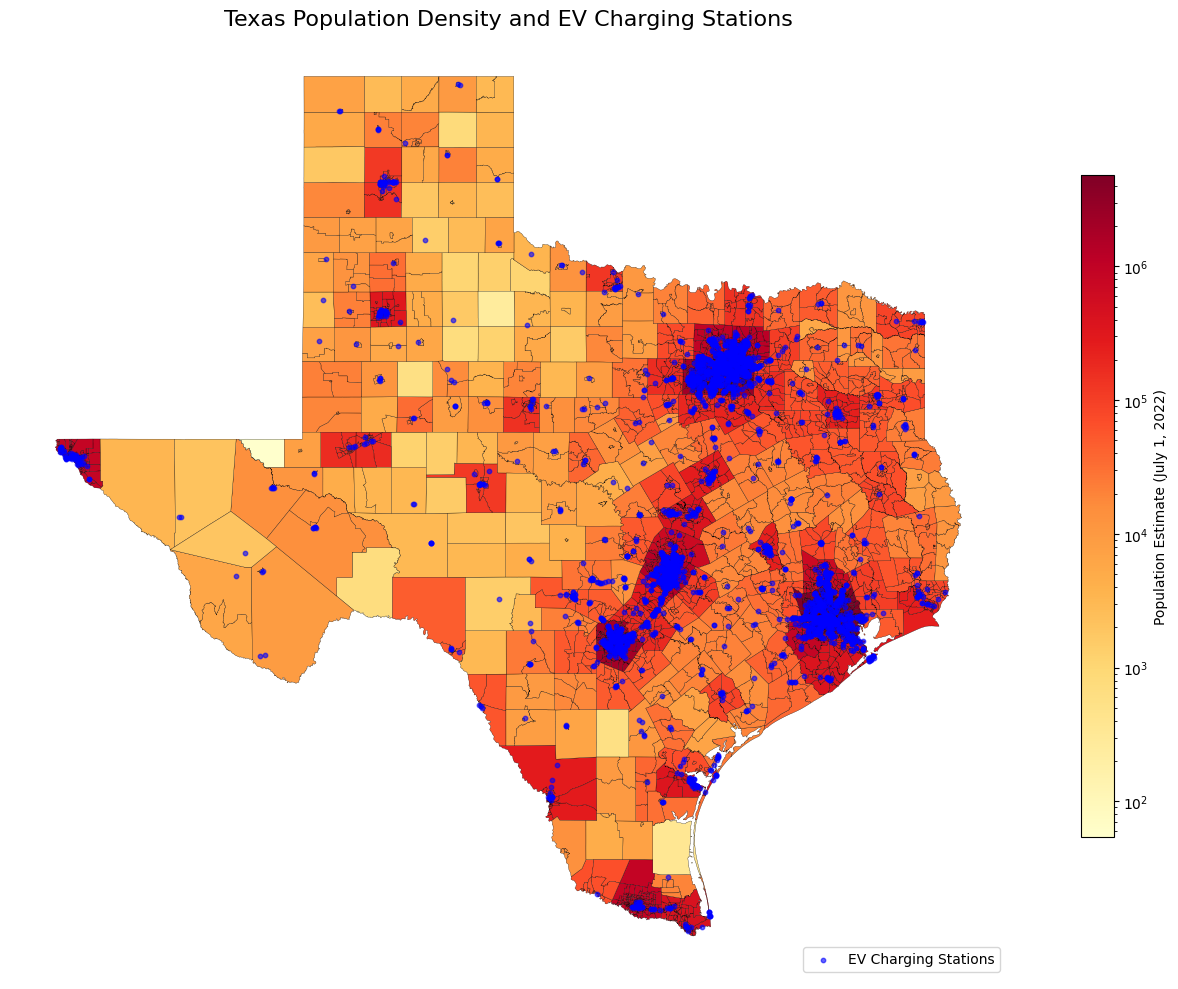


Population Summary Statistics:
count    6.884000e+03
mean     1.558232e+06
std      1.655919e+06
min      5.400000e+01
25%      1.819730e+05
50%      8.883800e+05
75%      2.625702e+06
max      4.813571e+06
Name: july1_2022_pop_est, dtype: float64

EV Charging Station Summary:
Total number of EV charging stations: 4144

Counties with high population but few charging stations:
Collin: Population 1160686, Charging Stations: 0
Collin: Population 1160686, Charging Stations: 1
Collin: Population 1160686, Charging Stations: 0
Collin: Population 1160686, Charging Stations: 0
Denton: Population 976840, Charging Stations: 0
Denton: Population 976840, Charging Stations: 0
Harris: Population 4813571, Charging Stations: 1
Harris: Population 4813571, Charging Stations: 0
Harris: Population 4813571, Charging Stations: 0
Harris: Population 4813571, Charging Stations: 0
Harris: Population 4813571, Charging Stations: 0
Harris: Population 4813571, Charging Stations: 0
Harris: Population 4813571, Chargi

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Load the EV charging station data
ev_stations = pd.read_csv('alt_fuel_stations (Aug 22 2024).csv')

# Load the population data (assuming you have this from the previous Texas population script)
population_data = pd.read_csv('2022_txpopest_county.csv')

# Load Texas counties shapefile
counties = gpd.read_file('cb_2023_48_tract_500k.shp')

# Set CRS for counties explicitly
counties = counties.set_crs("EPSG:4326")

# Clean up the county names in the shapefile
counties['clean_county'] = counties['NAMELSADCO'].str.replace(' County', '')

# Function to standardize county names
def standardize_county_name(name):
    name = name.lower()
    name = name.replace('de witt', 'dewitt')
    # Add more replacements here if needed
    return name.title()

# Apply standardization to both dataframes
counties['clean_county'] = counties['clean_county'].apply(standardize_county_name)
population_data['county'] = population_data['county'].apply(standardize_county_name)

# Merge the population data with the counties
merged = counties.merge(population_data, left_on='clean_county', right_on='county', how='left')

# Convert EV stations to GeoDataFrame
ev_gdf = gpd.GeoDataFrame(
    ev_stations,
    geometry=gpd.points_from_xy(ev_stations.Longitude, ev_stations.Latitude),
    crs="EPSG:4326"
)

# Ensure both GeoDataFrames use the same coordinate reference system
merged = merged.to_crs(ev_gdf.crs)

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot population density with a logarithmic color scale
norm = colors.LogNorm(vmin=merged['july1_2022_pop_est'].min(), vmax=merged['july1_2022_pop_est'].max())
merged.plot(column='july1_2022_pop_est', ax=ax,
            norm=norm,
            legend=True,
            legend_kwds={'label': 'Population Estimate (July 1, 2022)', 'shrink': 0.7},
            cmap='YlOrRd',
            edgecolor='black',
            linewidth=0.2)

# Plot EV charging stations
ev_gdf.plot(ax=ax, color='blue', markersize=10, alpha=0.6, label='EV Charging Stations')

# Customize the plot
ax.set_title('Texas Population Density and EV Charging Stations', fontsize=16)
ax.axis('off')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Save the plot
plt.savefig('texas_population_ev_stations_heatmap.png', dpi=300, bbox_inches='tight')

# Print summary statistics
print("\nPopulation Summary Statistics:")
print(merged['july1_2022_pop_est'].describe())

print("\nEV Charging Station Summary:")
print(f"Total number of EV charging stations: {len(ev_gdf)}")

# Identify counties with high population but few charging stations
high_pop_low_charging = merged[
    (merged['july1_2022_pop_est'] > merged['july1_2022_pop_est'].median()) &
    (merged.geometry.apply(lambda g: len(ev_gdf[ev_gdf.within(g)])) < 2)
]

print("\nCounties with high population but few charging stations:")
for idx, row in high_pop_low_charging.iterrows():
    print(f"{row['clean_county']}: Population {row['july1_2022_pop_est']}, Charging Stations: {len(ev_gdf[ev_gdf.within(row.geometry)])}")

In [ ]:
!pip install geopandas
!pip install mesa

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.7/427.7 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 7.9 MB/s eta 0:00

In [ ]:
import mesa
import random
import matplotlib.pyplot as plt

def get_distance(pos1, pos2):
    """Calculate the Manhattan distance between two points"""
    x1, y1 = pos1
    x2, y2 = pos2
    return abs(x1 - x2) + abs(y1 - y2)

class EVCar(mesa.Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.battery_level = 100
        self.charging = False

    def move(self):
        if not self.charging:
            self.battery_level -= 5
            if self.battery_level < 0:
                self.battery_level = 0

    def charge(self):
        if self.battery_level < 100:
            self.battery_level += 20
            if self.battery_level > 100:
                self.battery_level = 100
        else:
            self.charging = False

    def step(self):
        if self.charging:
            self.charge()
        elif self.battery_level <= 20:
            # Find nearest charging station
            stations = [agent for agent in self.model.schedule.agents if isinstance(agent, ChargingStation)]
            if stations:
                nearest = min(stations, key=lambda a: get_distance(self.pos, a.pos))
                self.model.grid.move_agent(self, nearest.pos)
                self.charging = True
        else:
            possible_steps = self.model.grid.get_neighborhood(
                self.pos,
                moore=True,
                include_center=False)
            new_position = self.random.choice(possible_steps)
            self.model.grid.move_agent(self, new_position)
            self.move()

class ChargingStation(mesa.Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)

    def step(self):
        pass

class SimpleTexasEVModel(mesa.Model):
    def __init__(self, num_cars, num_stations, width, height):
        super().__init__()
        self.num_cars = num_cars
        self.num_stations = num_stations
        self.grid = mesa.space.MultiGrid(width, height, True)
        self.schedule = mesa.time.RandomActivation(self)

        # Create charging stations
        for i in range(self.num_stations):
            station = ChargingStation(i, self)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(station, (x, y))
            self.schedule.add(station)

        # Create cars
        for i in range(self.num_cars):
            car = EVCar(i + self.num_stations, self)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(car, (x, y))
            self.schedule.add(car)

        self.datacollector = mesa.DataCollector(
            model_reporters={"Avg Battery Level": lambda m: sum(a.battery_level for a in m.schedule.agents if isinstance(a, EVCar)) / m.num_cars}
        )

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

# Run the model
model = SimpleTexasEVModel(num_cars=50, num_stations=5, width=20, height=20)
for _ in range(100):
    model.step()

# Plot results
results = model.datacollector.get_model_vars_dataframe()
plt.figure(figsize=(10, 5))
results.plot(y='Avg Battery Level')
plt.title('Average EV Battery Level Over Time')
plt.xlabel('Step')
plt.ylabel('Average Battery Level')
plt.show()

# Visualization of final state
agent_counts = {}
for contents, (x, y) in model.grid.coord_iter():
    agent_count = len(contents)
    agent_counts[(x, y)] = agent_count

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xticks([])
ax.set_yticks([])
for (x, y), count in agent_counts.items():
    color = 'red' if any(isinstance(agent, ChargingStation) for agent in model.grid[x][y]) else 'blue'
    size = 100 + count * 200
    ax.scatter(x, y, color=color, s=size, alpha=0.5)

plt.title('EV and Charging Station Distribution')
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='red', label="Charging Station")[0]
blue_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='blue', label="EV")[0]
plt.legend(handles=[red_patch, blue_patch])
plt.show()

<Figure size 1000x500 with 0 Axes>

In [ ]:
!pip install geopandas
!pip install mesa
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install shapely

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.7/427.7 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 11.3 MB/s eta 0:0

<ipython-input-8-4e92f4e4dfed>:44: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)
<ipython-input-8-4e92f4e4dfed>:111: UserWarning: Agent CS_0 is being placed with
place_agent() despite already having the position (36, 32). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(charging_station, cell)
<ipython-input-8-4e92f4e4dfed>:111: UserWarning: Agent CS_1 is being placed with
place_agent() despite already having the position (36, 31). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(charging_station, cell)
<ipython-input-8-4e92f4e4dfed>:111: UserWarning: Agent CS_2 is being placed with
place_agent() despite already having the position (37, 32). In most
cases, you'd want to

<Figure size 1000x500 with 0 Axes>

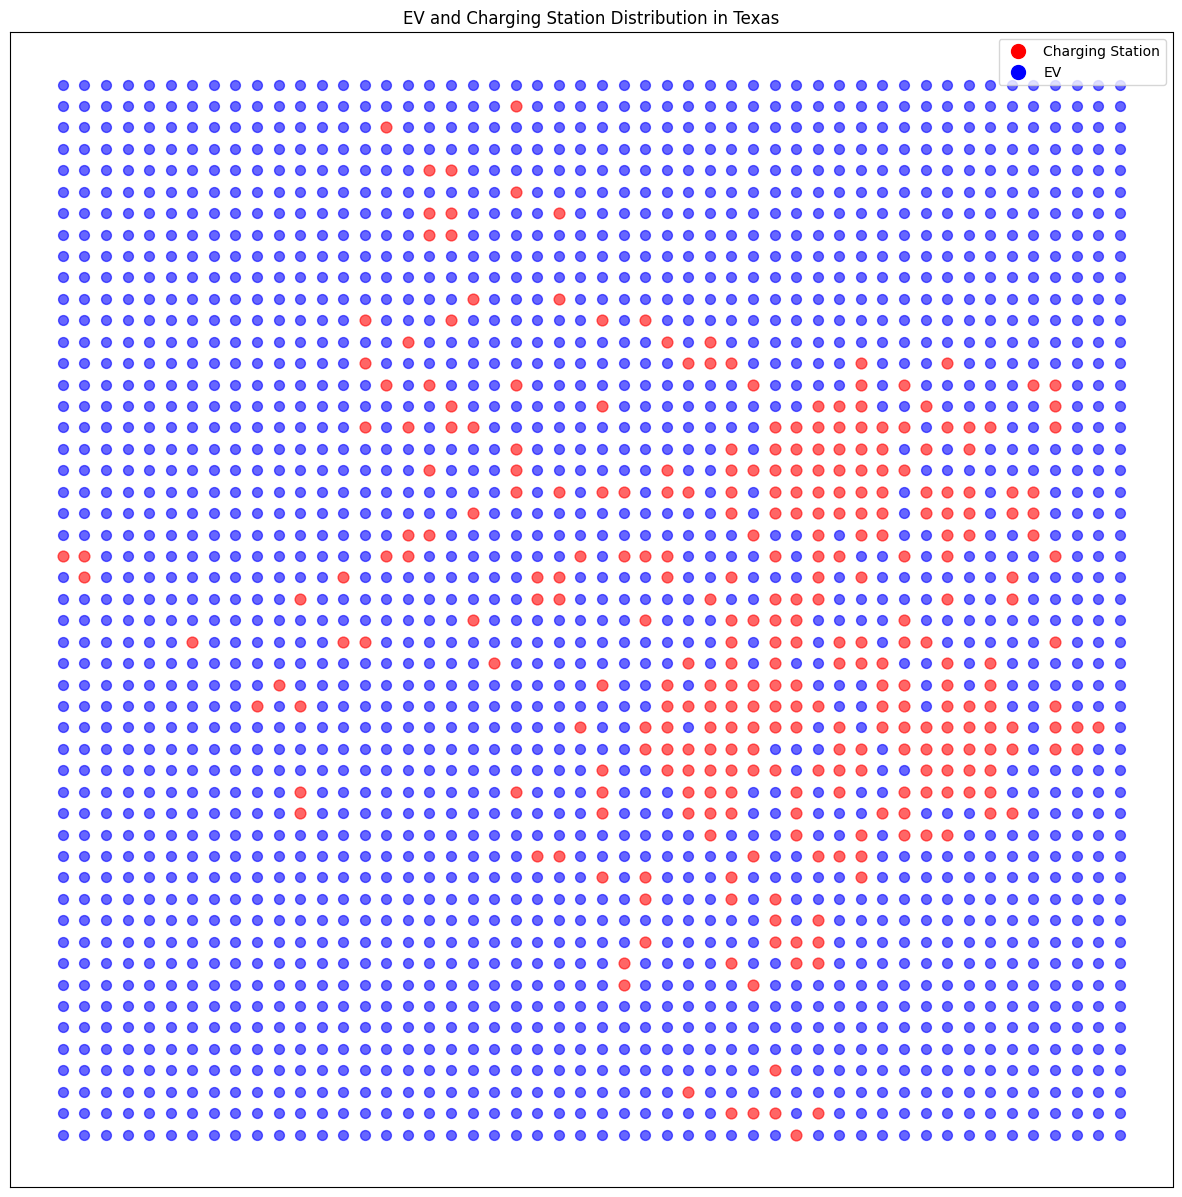

Number of EVs: 0
Number of Charging Stations: 314
Final Average Battery Level: 0.00%


In [ ]:
import mesa
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
from collections import defaultdict

# Load and preprocess data
def load_data():
    # Load population data
    population_data = pd.read_csv('2022_txpopest_county.csv')
    population_data['county'] = population_data['county'].str.upper()

    # Load Texas counties shapefile
    counties = gpd.read_file('cb_2023_48_tract_500k.shp')
    counties['NAME'] = counties['NAMELSADCO'].str.replace(' County', '').str.upper()

    # Merge population data with counties
    merged = counties.merge(population_data, left_on='NAME', right_on='county', how='left')

    # Load EV charging station data
    ev_stations = pd.read_csv('alt_fuel_stations (Aug 22 2024).csv')
    ev_stations = ev_stations[ev_stations['State'] == 'TX']

    return merged, ev_stations

# Create a grid based on Texas geography
def create_texas_grid(merged, grid_size):
    xmin, ymin, xmax, ymax = merged.total_bounds
    x_grid = np.linspace(xmin, xmax, grid_size)
    y_grid = np.linspace(ymin, ymax, grid_size)
    return x_grid, y_grid

# Find the grid cell for a given point
def find_grid_cell(point, x_grid, y_grid):
    x, y = point.x, point.y
    cell_x = np.searchsorted(x_grid, x) - 1
    cell_y = np.searchsorted(y_grid, y) - 1
    return cell_x, cell_y

class AggregatedChargingStation(mesa.Agent):
    def __init__(self, unique_id, model, pos, count):
        super().__init__(unique_id, model)
        self.pos = pos
        self.count = count

    def step(self):
        pass

class EVCar(mesa.Agent):
    def __init__(self, unique_id, model, pos):
        super().__init__(unique_id, model)
        self.pos = pos
        self.battery_level = 100
        self.charging = False

    def move(self):
        if not self.charging:
            possible_steps = self.model.grid.get_neighborhood(
                self.pos,
                moore=True,
                include_center=False
            )
            new_position = self.random.choice(possible_steps)
            self.model.grid.move_agent(self, new_position)
            self.battery_level -= 5
            if self.battery_level < 0:
                self.battery_level = 0

    def charge(self):
        if self.battery_level < 100:
            self.battery_level += 20
            if self.battery_level > 100:
                self.battery_level = 100
        else:
            self.charging = False

    def step(self):
        if self.charging:
            self.charge()
        elif self.battery_level <= 20:
            cell_contents = self.model.grid.get_cell_list_contents([self.pos])
            charging_stations = [obj for obj in cell_contents if isinstance(obj, AggregatedChargingStation)]
            if charging_stations:
                self.charging = True
            else:
                self.move()
        else:
            self.move()

class TexasEVModel(mesa.Model):
    def __init__(self, merged, ev_stations, grid_size):
        self.grid_size = grid_size
        self.grid = mesa.space.MultiGrid(grid_size, grid_size, False)
        self.schedule = mesa.time.RandomActivation(self)

        x_grid, y_grid = create_texas_grid(merged, grid_size)

        # Aggregate charging stations
        station_locations = defaultdict(int)
        for idx, station in ev_stations.iterrows():
            point = Point(station['Longitude'], station['Latitude'])
            cell = find_grid_cell(point, x_grid, y_grid)
            if 0 <= cell[0] < grid_size and 0 <= cell[1] < grid_size:
                station_locations[cell] += 1

        # Place aggregated charging stations
        for idx, (cell, count) in enumerate(station_locations.items()):
            charging_station = AggregatedChargingStation(f"CS_{idx}", self, cell, count)
            self.grid.place_agent(charging_station, cell)
            self.schedule.add(charging_station)

        # Place EVs based on population density
        merged['july1_2022_pop_est'] = pd.to_numeric(merged['july1_2022_pop_est'], errors='coerce')
        total_population = merged['july1_2022_pop_est'].sum()
        num_evs = 1000  # You can adjust this number
        ev_counter = 0
        for idx, county in merged.iterrows():
            if pd.notna(county['july1_2022_pop_est']):
                num_county_evs = int((county['july1_2022_pop_est'] / total_population) * num_evs)
                county_center = county['geometry'].centroid
                cell = find_grid_cell(county_center, x_grid, y_grid)
                for i in range(num_county_evs):
                    if 0 <= cell[0] < grid_size and 0 <= cell[1] < grid_size:
                        ev = EVCar(f"EV_{ev_counter}", self, cell)
                        self.grid.place_agent(ev, cell)
                        self.schedule.add(ev)
                        ev_counter += 1

        self.datacollector = mesa.DataCollector(
            model_reporters={"Avg Battery Level": lambda m: self.average_battery_level()}
        )

    def average_battery_level(self):
        ev_agents = [agent for agent in self.schedule.agents if isinstance(agent, EVCar)]
        if ev_agents:
            return sum(agent.battery_level for agent in ev_agents) / len(ev_agents)
        return 0

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

# Run the simulation
merged, ev_stations = load_data()
model = TexasEVModel(merged, ev_stations, grid_size=50)

for _ in range(100):
    model.step()

# Plot results
results = model.datacollector.get_model_vars_dataframe()
plt.figure(figsize=(10, 5))
results.plot(y='Avg Battery Level')
plt.title('Average EV Battery Level Over Time')
plt.xlabel('Step')
plt.ylabel('Average Battery Level')
plt.show()

# Visualization of final state
agent_counts = {}
for contents, (x, y) in model.grid.coord_iter():
    agent_count = len(contents)
    agent_counts[(x, y)] = agent_count

fig, ax = plt.subplots(figsize=(15, 15))
ax.set_xticks([])
ax.set_yticks([])

for (x, y), count in agent_counts.items():
    color = 'red' if any(isinstance(agent, AggregatedChargingStation) for agent in model.grid[x][y]) else 'blue'
    size = 50 + count * 10  # Adjust size scaling as needed
    ax.scatter(x, y, color=color, s=size, alpha=0.6)

plt.title('EV and Charging Station Distribution in Texas')
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='red', label="Charging Station")[0]
blue_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='blue', label="EV")[0]
plt.legend(handles=[red_patch, blue_patch])
plt.show()

# Print some statistics
num_evs = sum(1 for agent in model.schedule.agents if isinstance(agent, EVCar))
num_charging_stations = sum(1 for agent in model.schedule.agents if isinstance(agent, AggregatedChargingStation))
print(f"Number of EVs: {num_evs}")
print(f"Number of Charging Stations: {num_charging_stations}")
print(f"Final Average Battery Level: {model.average_battery_level():.2f}%")


Streaming output truncated to the last 5000 lines.
<ipython-input-9-638367061b6b>:128: UserWarning: Agent EV_5878 is being placed with
place_agent() despite already having the position (15, 27). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(ev, cell)
<ipython-input-9-638367061b6b>:128: UserWarning: Agent EV_5879 is being placed with
place_agent() despite already having the position (32, 19). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(ev, cell)
<ipython-input-9-638367061b6b>:128: UserWarning: Agent EV_5880 is being placed with
place_agent() despite already having the position (41, 19). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(ev, cell)
<ipython-input-9-638367061b6b>:128: UserWarning: Agent EV_5881 is being placed with
place_a

Total EVs placed: 6878


<Figure size 1000x500 with 0 Axes>

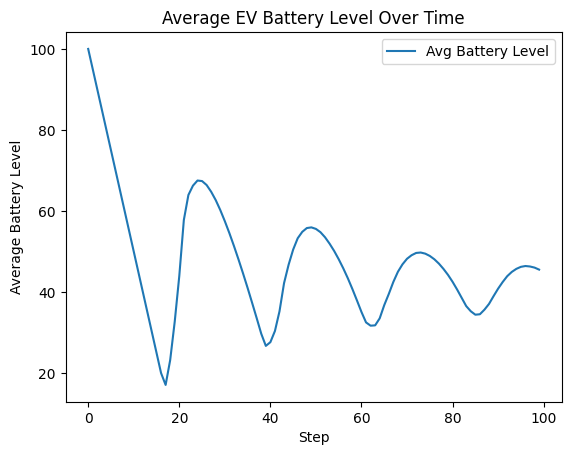

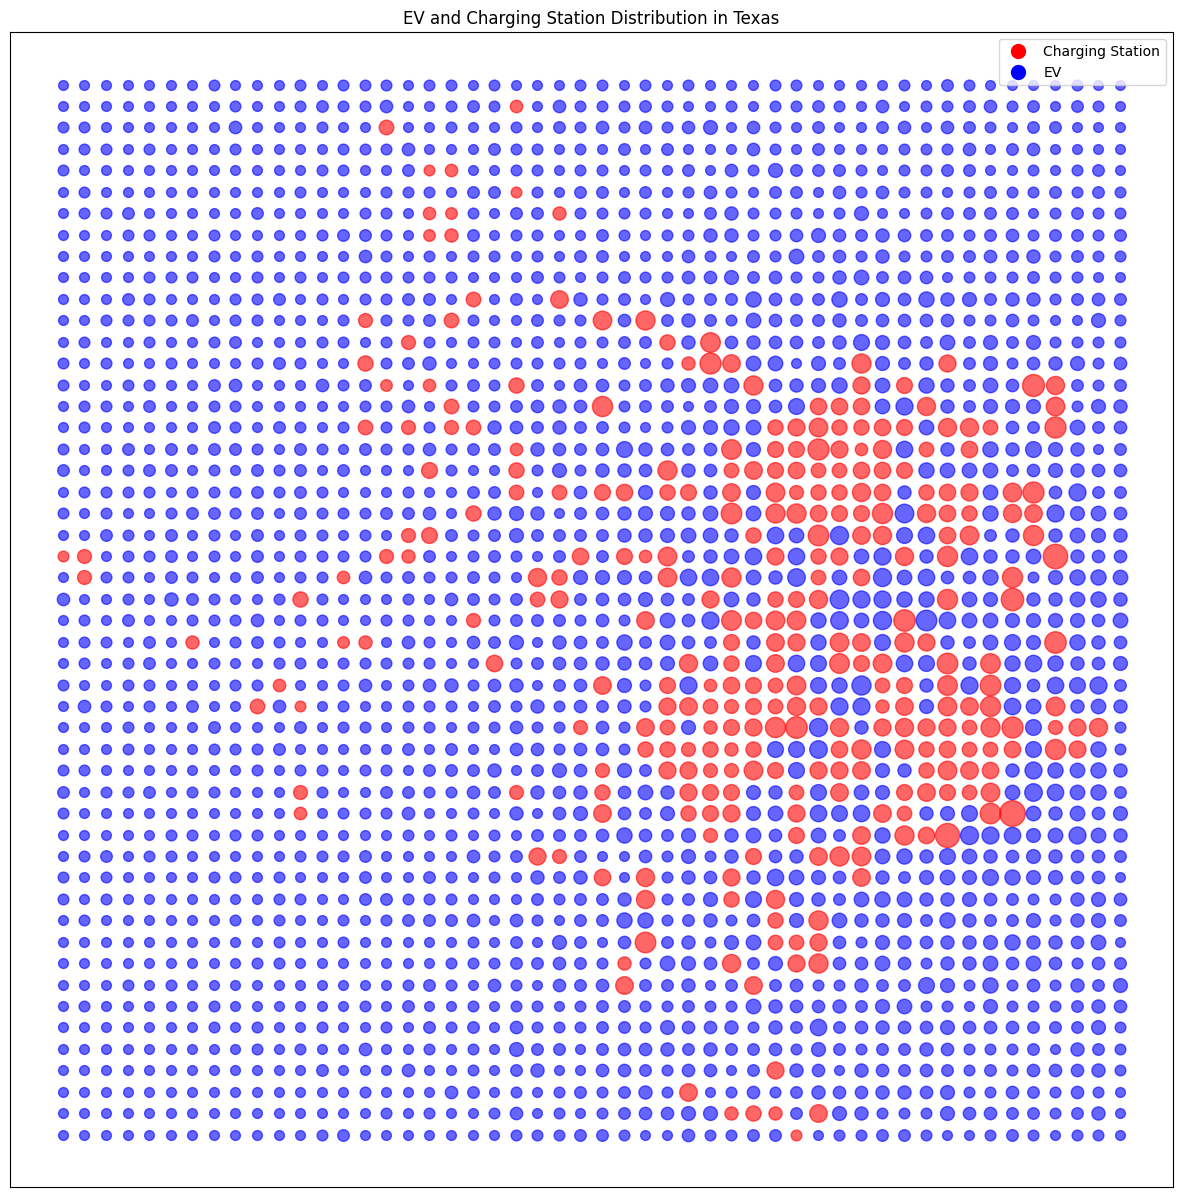

Number of EVs: 6878
Number of Charging Stations: 314
Final Average Battery Level: 44.85%


In [ ]:
import mesa
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
from collections import defaultdict

# Load and preprocess data
def load_data():
    # Load population data
    population_data = pd.read_csv('2022_txpopest_county.csv')
    population_data['county'] = population_data['county'].str.upper()

    # Load Texas counties shapefile
    counties = gpd.read_file('cb_2023_48_tract_500k.shp')
    counties['NAME'] = counties['NAMELSADCO'].str.replace(' County', '').str.upper()

    # Merge population data with counties
    merged = counties.merge(population_data, left_on='NAME', right_on='county', how='left')

    # Load EV charging station data
    ev_stations = pd.read_csv('alt_fuel_stations (Aug 22 2024).csv')
    ev_stations = ev_stations[ev_stations['State'] == 'TX']

    return merged, ev_stations

# Create a grid based on Texas geography
def create_texas_grid(merged, grid_size):
    xmin, ymin, xmax, ymax = merged.total_bounds
    x_grid = np.linspace(xmin, xmax, grid_size)
    y_grid = np.linspace(ymin, ymax, grid_size)
    return x_grid, y_grid

# Find the grid cell for a given point
def find_grid_cell(point, x_grid, y_grid):
    x, y = point.x, point.y
    cell_x = np.searchsorted(x_grid, x) - 1
    cell_y = np.searchsorted(y_grid, y) - 1
    return cell_x, cell_y

class AggregatedChargingStation(mesa.Agent):
    def __init__(self, unique_id, model, pos, count):
        super().__init__(unique_id, model)
        self.pos = pos
        self.count = count

    def step(self):
        pass

class EVCar(mesa.Agent):
    def __init__(self, unique_id, model, pos):
        super().__init__(unique_id, model)
        self.pos = pos
        self.battery_level = 100
        self.charging = False

    def move(self):
        if not self.charging:
            possible_steps = self.model.grid.get_neighborhood(
                self.pos,
                moore=True,
                include_center=False
            )
            new_position = self.random.choice(possible_steps)
            self.model.grid.move_agent(self, new_position)
            self.battery_level -= 5
            if self.battery_level < 0:
                self.battery_level = 0

    def charge(self):
        if self.battery_level < 100:
            self.battery_level += 20
            if self.battery_level > 100:
                self.battery_level = 100
        else:
            self.charging = False

    def step(self):
        if self.charging:
            self.charge()
        elif self.battery_level <= 20:
            cell_contents = self.model.grid.get_cell_list_contents([self.pos])
            charging_stations = [obj for obj in cell_contents if isinstance(obj, AggregatedChargingStation)]
            if charging_stations:
                self.charging = True
            else:
                self.move()
        else:
            self.move()

class TexasEVModel(mesa.Model):
    def __init__(self, merged, ev_stations, grid_size):
        self.grid_size = grid_size
        self.grid = mesa.space.MultiGrid(grid_size, grid_size, False)
        self.schedule = mesa.time.RandomActivation(self)

        x_grid, y_grid = create_texas_grid(merged, grid_size)

        # Aggregate charging stations
        station_locations = defaultdict(int)
        for idx, station in ev_stations.iterrows():
            point = Point(station['Longitude'], station['Latitude'])
            cell = find_grid_cell(point, x_grid, y_grid)
            if 0 <= cell[0] < grid_size and 0 <= cell[1] < grid_size:
                station_locations[cell] += 1

        # Place aggregated charging stations
        for idx, (cell, count) in enumerate(station_locations.items()):
            charging_station = AggregatedChargingStation(f"CS_{idx}", self, cell, count)
            self.grid.place_agent(charging_station, cell)
            self.schedule.add(charging_station)

        # Place EVs based on population density
        merged['july1_2022_pop_est'] = pd.to_numeric(merged['july1_2022_pop_est'], errors='coerce')
        total_population = merged['july1_2022_pop_est'].sum()
        num_evs = 1000  # You can adjust this number
        ev_counter = 0

        for idx, county in merged.iterrows():
            if pd.notna(county['july1_2022_pop_est']) and total_population > 0:
                num_county_evs = max(1, int((county['july1_2022_pop_est'] / total_population) * num_evs))
                county_center = county['geometry'].centroid
                cell = find_grid_cell(county_center, x_grid, y_grid)
                for i in range(num_county_evs):
                    if 0 <= cell[0] < grid_size and 0 <= cell[1] < grid_size:
                        ev = EVCar(f"EV_{ev_counter}", self, cell)
                        self.grid.place_agent(ev, cell)
                        self.schedule.add(ev)
                        ev_counter += 1

        print(f"Total EVs placed: {ev_counter}")

        self.datacollector = mesa.DataCollector(
            model_reporters={"Avg Battery Level": lambda m: self.average_battery_level()}
        )

    def average_battery_level(self):
        ev_agents = [agent for agent in self.schedule.agents if isinstance(agent, EVCar)]
        if ev_agents:
            return sum(agent.battery_level for agent in ev_agents) / len(ev_agents)
        return 0

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

# Run the simulation
merged, ev_stations = load_data()
model = TexasEVModel(merged, ev_stations, grid_size=50)

for _ in range(100):
    model.step()

# Plot results
results = model.datacollector.get_model_vars_dataframe()
plt.figure(figsize=(10, 5))
results.plot(y='Avg Battery Level')
plt.title('Average EV Battery Level Over Time')
plt.xlabel('Step')
plt.ylabel('Average Battery Level')
plt.show()

# Visualization of final state
agent_counts = {}
for contents, (x, y) in model.grid.coord_iter():
    agent_count = len(contents)
    agent_counts[(x, y)] = agent_count

fig, ax = plt.subplots(figsize=(15, 15))
ax.set_xticks([])
ax.set_yticks([])

for (x, y), count in agent_counts.items():
    color = 'red' if any(isinstance(agent, AggregatedChargingStation) for agent in model.grid[x][y]) else 'blue'
    size = 50 + count * 10  # Adjust size scaling as needed
    ax.scatter(x, y, color=color, s=size, alpha=0.6)

plt.title('EV and Charging Station Distribution in Texas')
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='red', label="Charging Station")[0]
blue_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='blue', label="EV")[0]
plt.legend(handles=[red_patch, blue_patch])
plt.show()

# Print some statistics
num_evs = sum(1 for agent in model.schedule.agents if isinstance(agent, EVCar))
num_charging_stations = sum(1 for agent in model.schedule.agents if isinstance(agent, AggregatedChargingStation))
print(f"Number of EVs: {num_evs}")
print(f"Number of Charging Stations: {num_charging_stations}")
print(f"Final Average Battery Level: {model.average_battery_level():.2f}%")


In [ ]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 54.5 MB/s eta 0:00:00


CRS not found in shapefile. Assuming NAD83 (EPSG:4269).


Streaming output truncated to the last 5000 lines.
<ipython-input-13-2a1550603932>:129: UserWarning: Agent EV_5878 is being placed with
place_agent() despite already having the position (15, 27). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(ev, cell)
<ipython-input-13-2a1550603932>:129: UserWarning: Agent EV_5879 is being placed with
place_agent() despite already having the position (32, 19). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(ev, cell)
<ipython-input-13-2a1550603932>:129: UserWarning: Agent EV_5880 is being placed with
place_agent() despite already having the position (41, 19). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(ev, cell)
<ipython-input-13-2a1550603932>:129: UserWarning: Agent EV_5881 is being placed with
pla

Total EVs placed: 6878


AttributeError: Stamen

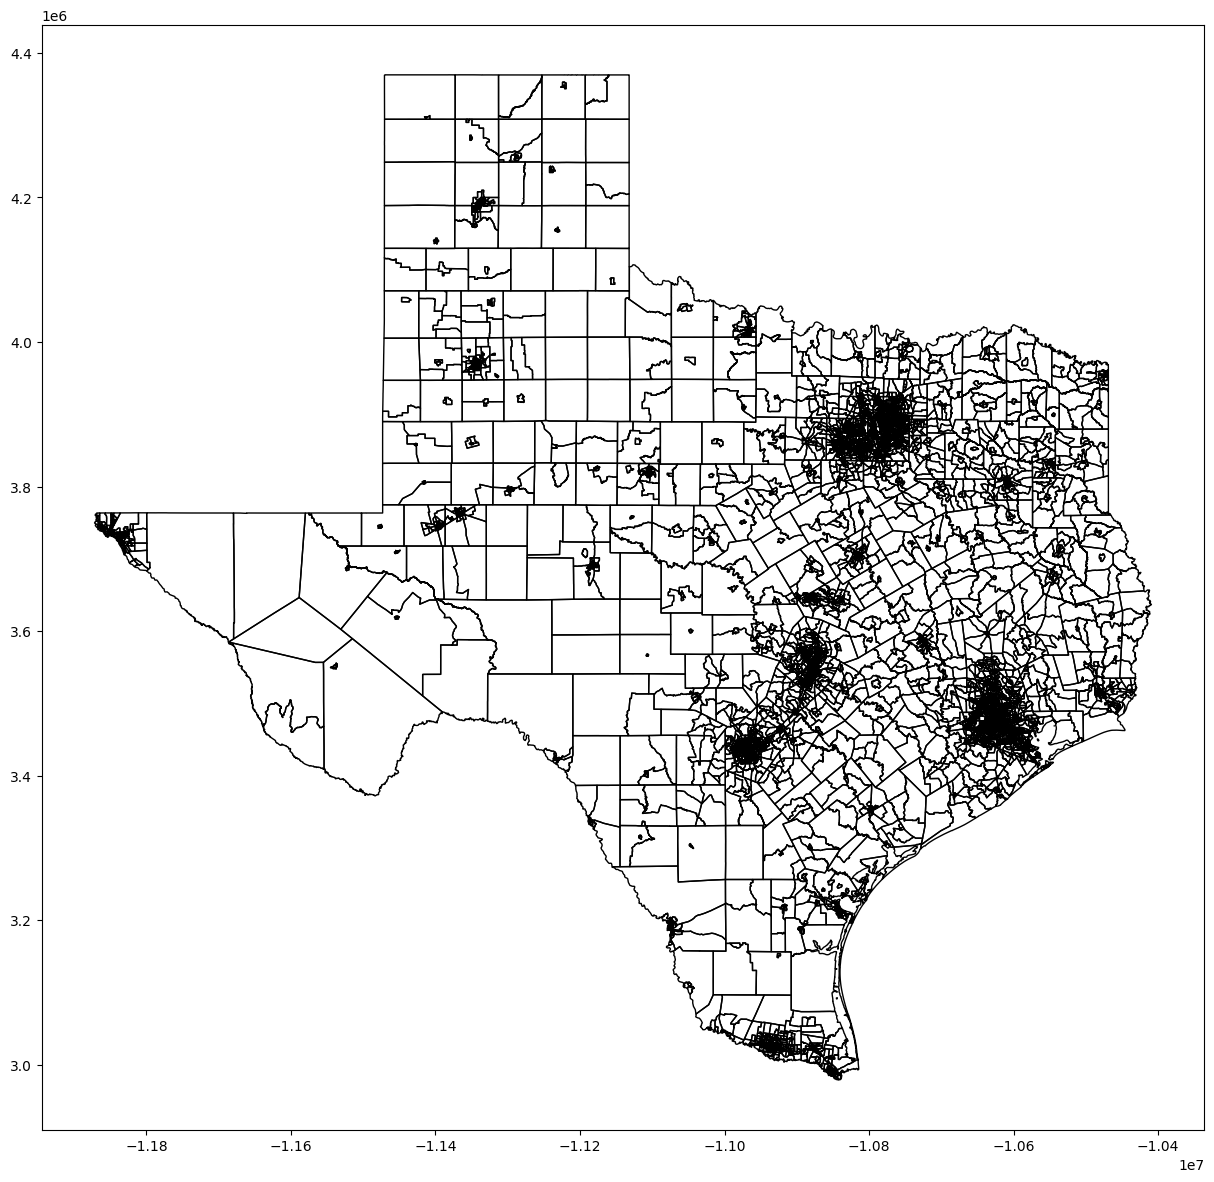

In [ ]:
import mesa
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
from collections import defaultdict
import contextily as ctx

# Load and preprocess data
def load_data():
    # Load population data
    population_data = pd.read_csv('2022_txpopest_county.csv')
    population_data['county'] = population_data['county'].str.upper()

    # Load Texas counties shapefile
    counties = gpd.read_file('cb_2023_48_tract_500k.shp')
    counties['NAME'] = counties['NAMELSADCO'].str.replace(' County', '').str.upper()

    # Merge population data with counties
    merged = counties.merge(population_data, left_on='NAME', right_on='county', how='left')

    # Load EV charging station data
    ev_stations = pd.read_csv('alt_fuel_stations (Aug 22 2024).csv')
    ev_stations = ev_stations[ev_stations['State'] == 'TX']

    return merged, ev_stations

# Create a grid based on Texas geography
def create_texas_grid(merged, grid_size):
    xmin, ymin, xmax, ymax = merged.total_bounds
    x_grid = np.linspace(xmin, xmax, grid_size)
    y_grid = np.linspace(ymin, ymax, grid_size)
    return x_grid, y_grid

# Find the grid cell for a given point
def find_grid_cell(point, x_grid, y_grid):
    x, y = point.x, point.y
    cell_x = np.searchsorted(x_grid, x) - 1
    cell_y = np.searchsorted(y_grid, y) - 1
    return cell_x, cell_y

class AggregatedChargingStation(mesa.Agent):
    def __init__(self, unique_id, model, pos, count):
        super().__init__(unique_id, model)
        self.pos = pos
        self.count = count

    def step(self):
        pass

class EVCar(mesa.Agent):
    def __init__(self, unique_id, model, pos):
        super().__init__(unique_id, model)
        self.pos = pos
        self.battery_level = 100
        self.charging = False

    def move(self):
        if not self.charging:
            possible_steps = self.model.grid.get_neighborhood(
                self.pos,
                moore=True,
                include_center=False
            )
            new_position = self.random.choice(possible_steps)
            self.model.grid.move_agent(self, new_position)
            self.battery_level -= 5
            if self.battery_level < 0:
                self.battery_level = 0

    def charge(self):
        if self.battery_level < 100:
            self.battery_level += 20
            if self.battery_level > 100:
                self.battery_level = 100
        else:
            self.charging = False

    def step(self):
        if self.charging:
            self.charge()
        elif self.battery_level <= 20:
            cell_contents = self.model.grid.get_cell_list_contents([self.pos])
            charging_stations = [obj for obj in cell_contents if isinstance(obj, AggregatedChargingStation)]
            if charging_stations:
                self.charging = True
            else:
                self.move()
        else:
            self.move()

class TexasEVModel(mesa.Model):
    def __init__(self, merged, ev_stations, grid_size):
        self.grid_size = grid_size
        self.grid = mesa.space.MultiGrid(grid_size, grid_size, False)
        self.schedule = mesa.time.RandomActivation(self)

        x_grid, y_grid = create_texas_grid(merged, grid_size)

        # Aggregate charging stations
        station_locations = defaultdict(int)
        for idx, station in ev_stations.iterrows():
            point = Point(station['Longitude'], station['Latitude'])
            cell = find_grid_cell(point, x_grid, y_grid)
            if 0 <= cell[0] < grid_size and 0 <= cell[1] < grid_size:
                station_locations[cell] += 1

        # Place aggregated charging stations
        for idx, (cell, count) in enumerate(station_locations.items()):
            charging_station = AggregatedChargingStation(f"CS_{idx}", self, cell, count)
            self.grid.place_agent(charging_station, cell)
            self.schedule.add(charging_station)

        # Place EVs based on population density
        merged['july1_2022_pop_est'] = pd.to_numeric(merged['july1_2022_pop_est'], errors='coerce')
        total_population = merged['july1_2022_pop_est'].sum()
        num_evs = 1000  # You can adjust this number
        ev_counter = 0

        for idx, county in merged.iterrows():
            if pd.notna(county['july1_2022_pop_est']) and total_population > 0:
                num_county_evs = max(1, int((county['july1_2022_pop_est'] / total_population) * num_evs))
                county_center = county['geometry'].centroid
                cell = find_grid_cell(county_center, x_grid, y_grid)
                for i in range(num_county_evs):
                    if 0 <= cell[0] < grid_size and 0 <= cell[1] < grid_size:
                        ev = EVCar(f"EV_{ev_counter}", self, cell)
                        self.grid.place_agent(ev, cell)
                        self.schedule.add(ev)
                        ev_counter += 1

        print(f"Total EVs placed: {ev_counter}")

        self.datacollector = mesa.DataCollector(
            model_reporters={"Avg Battery Level": lambda m: self.average_battery_level()}
        )

    def average_battery_level(self):
        ev_agents = [agent for agent in self.schedule.agents if isinstance(agent, EVCar)]
        if ev_agents:
            return sum(agent.battery_level for agent in ev_agents) / len(ev_agents)
        return 0

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

# Load Texas shapefile
texas = gpd.read_file('cb_2023_48_tract_500k.shp')

# Check if CRS is set, if not, assume it's in NAD83 (EPSG:4269)
if texas.crs is None:
    print("CRS not found in shapefile. Assuming NAD83 (EPSG:4269).")
    texas = texas.set_crs(epsg=4269, inplace=True)

# Now we can safely transform to Web Mercator
texas = texas.to_crs(epsg=3857)  # Web Mercator projection

# Create a function to convert grid coordinates to geographic coordinates
def grid_to_geo(x, y, x_grid, y_grid, texas_bounds):
    lon = np.interp(x, [0, len(x_grid)-1], [texas_bounds[0], texas_bounds[2]])
    lat = np.interp(y, [0, len(y_grid)-1], [texas_bounds[1], texas_bounds[3]])
    return lon, lat

# After running the simulation
merged, ev_stations = load_data()
model = TexasEVModel(merged, ev_stations, grid_size=50)

for _ in range(100):
    model.step()

# Prepare data for plotting
ev_locations = []
cs_locations = []
x_grid, y_grid = create_texas_grid(merged, model.grid_size)
texas_bounds = texas.total_bounds

for contents, (x, y) in model.grid.coord_iter():
    lon, lat = grid_to_geo(x, y, x_grid, y_grid, texas_bounds)
    for agent in contents:
        if isinstance(agent, EVCar):
            ev_locations.append((lon, lat))
        elif isinstance(agent, AggregatedChargingStation):
            cs_locations.append((lon, lat))

ev_gdf = gpd.GeoDataFrame(geometry=[Point(x, y) for x, y in ev_locations], crs="EPSG:4326").to_crs(epsg=3857)
cs_gdf = gpd.GeoDataFrame(geometry=[Point(x, y) for x, y in cs_locations], crs="EPSG:4326").to_crs(epsg=3857)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 15))

# Plot Texas boundaries
texas.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot EVs and Charging Stations
ev_gdf.plot(ax=ax, color='blue', alpha=0.5, markersize=5, label='EV')
cs_gdf.plot(ax=ax, color='red', alpha=0.8, markersize=20, label='Charging Station')

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.TerrainBackground)

# Customize the plot
plt.title('EV and Charging Station Distribution in Texas', fontsize=16)
plt.legend(fontsize=12)
ax.axis('off')

# Add text for statistics
stats_text = f"Number of EVs: {len(ev_gdf)}\n" \
             f"Number of Charging Stations: {len(cs_gdf)}\n" \
             f"Final Average Battery Level: {model.average_battery_level():.2f}%"
plt.text(0.05, 0.05, stats_text, transform=ax.transAxes, fontsize=12,
         verticalalignment='bottom', bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Plot battery level over time
results = model.datacollector.get_model_vars_dataframe()
plt.figure(figsize=(10, 5))
results.plot(y='Avg Battery Level')
plt.title('Average EV Battery Level Over Time')
plt.xlabel('Step')
plt.ylabel('Average Battery Level')
plt.show()


In [ ]:
import mesa
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
from collections import defaultdict
import contextily as ctx

# Load and preprocess data
def load_data():
    # Load population data
    population_data = pd.read_csv('2022_txpopest_county.csv')
    population_data['county'] = population_data['county'].str.upper()

    # Load Texas counties shapefile
    counties = gpd.read_file('cb_2023_48_tract_500k.shp')
    counties['NAME'] = counties['NAMELSADCO'].str.replace(' County', '').str.upper()

    # Merge population data with counties
    merged = counties.merge(population_data, left_on='NAME', right_on='county', how='left')

    # Load EV charging station data
    ev_stations = pd.read_csv('alt_fuel_stations (Aug 22 2024).csv')
    ev_stations = ev_stations[ev_stations['State'] == 'TX']

    return merged, ev_stations

# Create a grid based on Texas geography
def create_texas_grid(merged, grid_size):
    xmin, ymin, xmax, ymax = merged.total_bounds
    x_grid = np.linspace(xmin, xmax, grid_size)
    y_grid = np.linspace(ymin, ymax, grid_size)
    return x_grid, y_grid

# Find the grid cell for a given point
def find_grid_cell(point, x_grid, y_grid):
    x, y = point.x, point.y
    cell_x = np.searchsorted(x_grid, x) - 1
    cell_y = np.searchsorted(y_grid, y) - 1
    return cell_x, cell_y

class AggregatedChargingStation(mesa.Agent):
    def __init__(self, unique_id, model, pos, count):
        super().__init__(unique_id, model)
        self.pos = pos
        self.count = count

    def step(self):
        pass

class EVCar(mesa.Agent):
    def __init__(self, unique_id, model, pos):
        super().__init__(unique_id, model)
        self.pos = pos
        self.battery_level = 100
        self.charging = False

    def move(self):
        if not self.charging:
            possible_steps = self.model.grid.get_neighborhood(
                self.pos,
                moore=True,
                include_center=False
            )
            new_position = self.random.choice(possible_steps)
            self.model.grid.move_agent(self, new_position)
            self.battery_level -= 5
            if self.battery_level < 0:
                self.battery_level = 0

    def charge(self):
        if self.battery_level < 100:
            self.battery_level += 20
            if self.battery_level > 100:
                self.battery_level = 100
        else:
            self.charging = False

    def step(self):
        if self.charging:
            self.charge()
        elif self.battery_level <= 20:
            cell_contents = self.model.grid.get_cell_list_contents([self.pos])
            charging_stations = [obj for obj in cell_contents if isinstance(obj, AggregatedChargingStation)]
            if charging_stations:
                self.charging = True
            else:
                self.move()
        else:
            self.move()

class TexasEVModel(mesa.Model):
    def __init__(self, merged, ev_stations, grid_size):
        self.grid_size = grid_size
        self.grid = mesa.space.MultiGrid(grid_size, grid_size, False)
        self.schedule = mesa.time.RandomActivation(self)

        x_grid, y_grid = create_texas_grid(merged, grid_size)

        # Aggregate charging stations
        station_locations = defaultdict(int)
        for idx, station in ev_stations.iterrows():
            point = Point(station['Longitude'], station['Latitude'])
            cell = find_grid_cell(point, x_grid, y_grid)
            if 0 <= cell[0] < grid_size and 0 <= cell[1] < grid_size:
                station_locations[cell] += 1

        # Place aggregated charging stations
        for idx, (cell, count) in enumerate(station_locations.items()):
            charging_station = AggregatedChargingStation(f"CS_{idx}", self, cell, count)
            self.grid.place_agent(charging_station, cell)
            self.schedule.add(charging_station)

        # Place EVs based on population density
        merged['july1_2022_pop_est'] = pd.to_numeric(merged['july1_2022_pop_est'], errors='coerce')
        total_population = merged['july1_2022_pop_est'].sum()
        num_evs = 1000  # You can adjust this number
        ev_counter = 0

        for idx, county in merged.iterrows():
            if pd.notna(county['july1_2022_pop_est']) and total_population > 0:
                num_county_evs = max(1, int((county['july1_2022_pop_est'] / total_population) * num_evs))
                county_center = county['geometry'].centroid
                cell = find_grid_cell(county_center, x_grid, y_grid)
                for i in range(num_county_evs):
                    if 0 <= cell[0] < grid_size and 0 <= cell[1] < grid_size:
                        ev = EVCar(f"EV_{ev_counter}", self, cell)
                        self.grid.place_agent(ev, cell)
                        self.schedule.add(ev)
                        ev_counter += 1

        print(f"Total EVs placed: {ev_counter}")

        self.datacollector = mesa.DataCollector(
            model_reporters={"Avg Battery Level": lambda m: self.average_battery_level()}
        )

    def average_battery_level(self):
        ev_agents = [agent for agent in self.schedule.agents if isinstance(agent, EVCar)]
        if ev_agents:
            return sum(agent.battery_level for agent in ev_agents) / len(ev_agents)
        return 0

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

# Load Texas shapefile
texas = gpd.read_file('cb_2023_48_tract_500k.shp')

# Check if CRS is set, if not, assume it's in NAD83 (EPSG:4269)
if texas.crs is None:
    print("CRS not found in shapefile. Assuming NAD83 (EPSG:4269).")
    texas = texas.set_crs(epsg=4269, inplace=True)

# Now we can safely transform to Web Mercator
texas = texas.to_crs(epsg=3857)  # Web Mercator projection

# Run the simulation
merged, ev_stations = load_data()
model = TexasEVModel(merged, ev_stations, grid_size=50)

for _ in range(100):
    model.step()

# Prepare data for plotting
ev_locations = []
cs_locations = []
x_grid, y_grid = create_texas_grid(merged, model.grid_size)
texas_bounds = texas.total_bounds

for contents, (x, y) in model.grid.coord_iter():
    lon, lat = grid_to_geo(x, y, x_grid, y_grid, texas_bounds)
    for agent in contents:
        if isinstance(agent, EVCar):
            ev_locations.append((lon, lat))
        elif isinstance(agent, AggregatedChargingStation):
            cs_locations.append((lon, lat))

ev_gdf = gpd.GeoDataFrame(geometry=[Point(x, y) for x, y in ev_locations], crs="EPSG:4326").to_crs(epsg=3857)
cs_gdf = gpd.GeoDataFrame(geometry=[Point(x, y) for x, y in cs_locations], crs="EPSG:4326").to_crs(epsg=3857)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 15))

# Plot Texas boundaries
texas.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot EVs and Charging Stations
ev_gdf.plot(ax=ax, color='blue', alpha=0.5, markersize=5, label='EV')
cs_gdf.plot(ax=ax, color='red', alpha=0.8, markersize=20, label='Charging Station')

# Add basemap (use OpenStreetMap if Stamen is not available)
try:
    ctx.add_basemap(ax, source=ctx.providers.Stamen.TerrainBackground)
except AttributeError:
    print("Stamen basemap not available. Using OpenStreetMap.")
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize the plot
plt.title('EV and Charging Station Distribution in Texas', fontsize=16)
plt.legend(fontsize=12)
ax.axis('off')

# Add text for statistics
stats_text = f"Number of EVs: {len(ev_gdf)}\n" \
             f"Number of Charging Stations: {len(cs_gdf)}\n" \
             f"Final Average Battery Level: {model.average_battery_level():.2f}%"
plt.text(0.05, 0.05, stats_text, transform=ax.transAxes, fontsize=12,
         verticalalignment='bottom', bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Plot battery level over time
plt.figure(figsize=(10, 5))
results = model.datacollector.get_model_vars_dataframe()
plt.plot(results.index, results['Avg Battery Level'])
plt.title('Average EV Battery Level Over Time')
plt.xlabel('Step')
plt.ylabel('Average Battery Level')
plt.show()


CRS not found in shapefile. Assuming NAD83 (EPSG:4269).


Streaming output truncated to the last 5000 lines.
<ipython-input-14-4cec8e86e6ee>:129: UserWarning: Agent EV_5878 is being placed with
place_agent() despite already having the position (15, 27). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(ev, cell)
<ipython-input-14-4cec8e86e6ee>:129: UserWarning: Agent EV_5879 is being placed with
place_agent() despite already having the position (32, 19). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(ev, cell)
<ipython-input-14-4cec8e86e6ee>:129: UserWarning: Agent EV_5880 is being placed with
place_agent() despite already having the position (41, 19). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(ev, cell)
<ipython-input-14-4cec8e86e6ee>:129: UserWarning: Agent EV_5881 is being placed with
pla

Total EVs placed: 6878
Stamen basemap not available. Using OpenStreetMap.


CRS not found in shapefile. Assuming NAD83 (EPSG:4269).


Streaming output truncated to the last 5000 lines.
<ipython-input-15-31d83efe30d8>:129: UserWarning: Agent EV_5878 is being placed with
place_agent() despite already having the position (15, 27). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(ev, cell)
<ipython-input-15-31d83efe30d8>:129: UserWarning: Agent EV_5879 is being placed with
place_agent() despite already having the position (32, 19). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(ev, cell)
<ipython-input-15-31d83efe30d8>:129: UserWarning: Agent EV_5880 is being placed with
place_agent() despite already having the position (41, 19). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(ev, cell)
<ipython-input-15-31d83efe30d8>:129: UserWarning: Agent EV_5881 is being placed with
pla

Total EVs placed: 6878
Stamen basemap not available. Using OpenStreetMap.


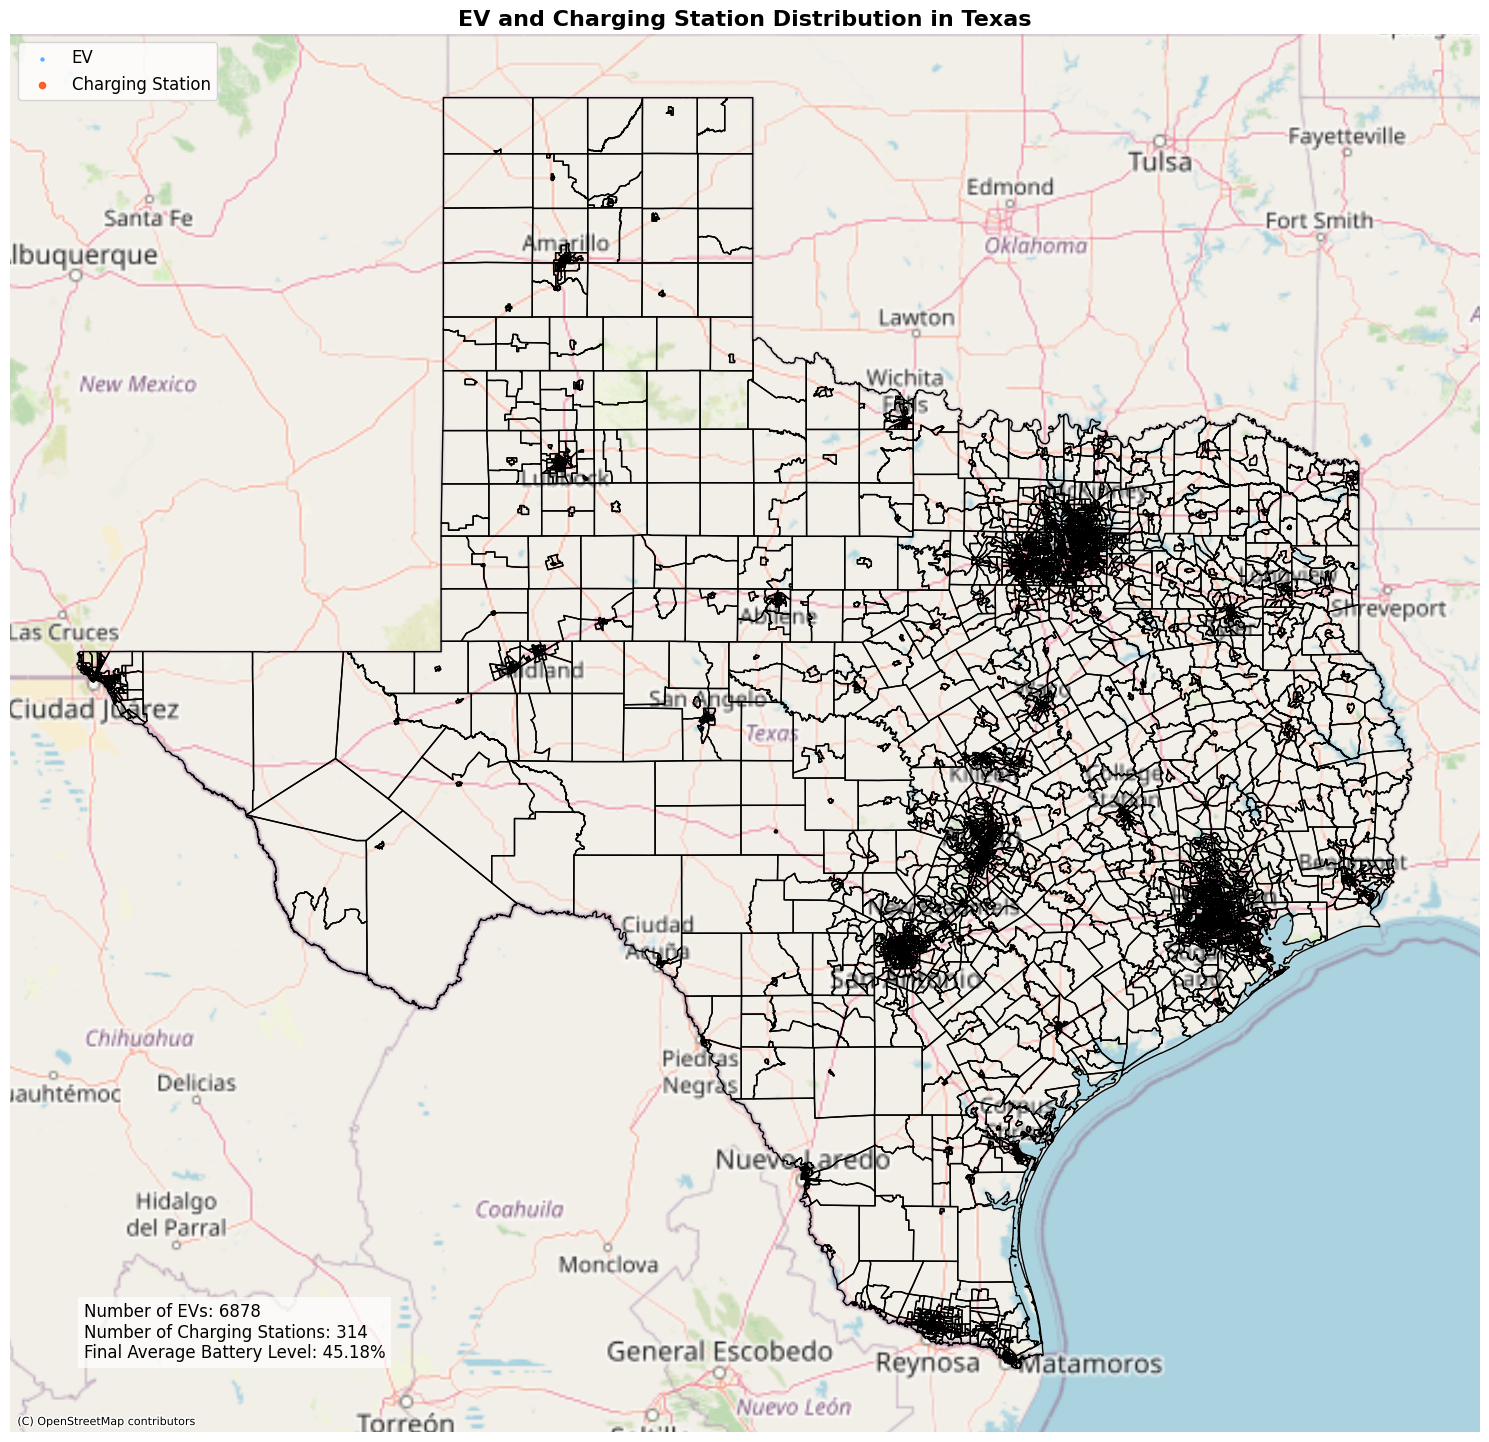

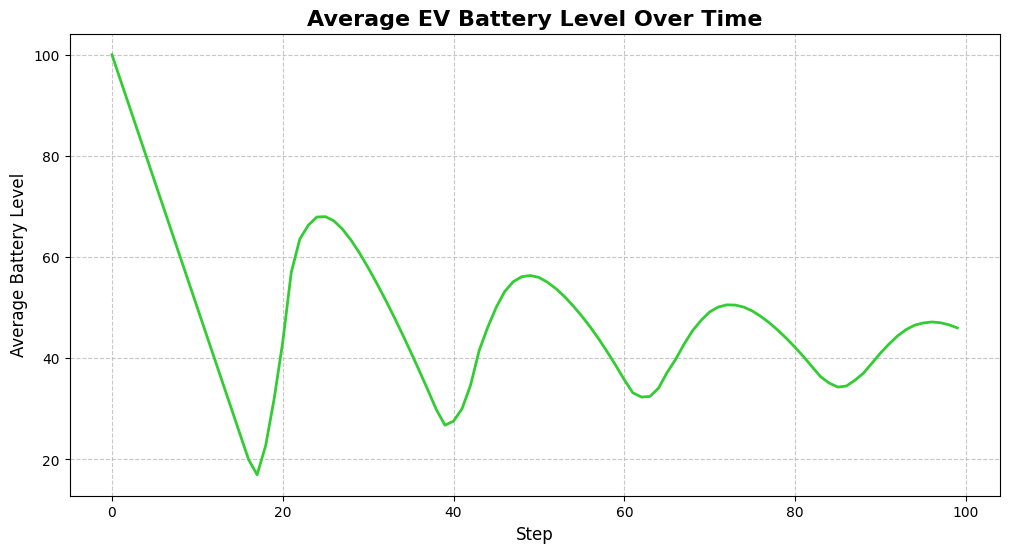

In [ ]:
import mesa
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
from collections import defaultdict
import contextily as ctx

# Load and preprocess data
def load_data():
    # Load population data
    population_data = pd.read_csv('2022_txpopest_county.csv')
    population_data['county'] = population_data['county'].str.upper()

    # Load Texas counties shapefile
    counties = gpd.read_file('cb_2023_48_tract_500k.shp')
    counties['NAME'] = counties['NAMELSADCO'].str.replace(' County', '').str.upper()

    # Merge population data with counties
    merged = counties.merge(population_data, left_on='NAME', right_on='county', how='left')

    # Load EV charging station data
    ev_stations = pd.read_csv('alt_fuel_stations (Aug 22 2024).csv')
    ev_stations = ev_stations[ev_stations['State'] == 'TX']

    return merged, ev_stations

# Create a grid based on Texas geography
def create_texas_grid(merged, grid_size):
    xmin, ymin, xmax, ymax = merged.total_bounds
    x_grid = np.linspace(xmin, xmax, grid_size)
    y_grid = np.linspace(ymin, ymax, grid_size)
    return x_grid, y_grid

# Find the grid cell for a given point
def find_grid_cell(point, x_grid, y_grid):
    x, y = point.x, point.y
    cell_x = np.searchsorted(x_grid, x) - 1
    cell_y = np.searchsorted(y_grid, y) - 1
    return cell_x, cell_y

class AggregatedChargingStation(mesa.Agent):
    def __init__(self, unique_id, model, pos, count):
        super().__init__(unique_id, model)
        self.pos = pos
        self.count = count

    def step(self):
        pass

class EVCar(mesa.Agent):
    def __init__(self, unique_id, model, pos):
        super().__init__(unique_id, model)
        self.pos = pos
        self.battery_level = 100
        self.charging = False

    def move(self):
        if not self.charging:
            possible_steps = self.model.grid.get_neighborhood(
                self.pos,
                moore=True,
                include_center=False
            )
            new_position = self.random.choice(possible_steps)
            self.model.grid.move_agent(self, new_position)
            self.battery_level -= 5
            if self.battery_level < 0:
                self.battery_level = 0

    def charge(self):
        if self.battery_level < 100:
            self.battery_level += 20
            if self.battery_level > 100:
                self.battery_level = 100
        else:
            self.charging = False

    def step(self):
        if self.charging:
            self.charge()
        elif self.battery_level <= 20:
            cell_contents = self.model.grid.get_cell_list_contents([self.pos])
            charging_stations = [obj for obj in cell_contents if isinstance(obj, AggregatedChargingStation)]
            if charging_stations:
                self.charging = True
            else:
                self.move()
        else:
            self.move()

class TexasEVModel(mesa.Model):
    def __init__(self, merged, ev_stations, grid_size):
        self.grid_size = grid_size
        self.grid = mesa.space.MultiGrid(grid_size, grid_size, False)
        self.schedule = mesa.time.RandomActivation(self)

        x_grid, y_grid = create_texas_grid(merged, grid_size)

        # Aggregate charging stations
        station_locations = defaultdict(int)
        for idx, station in ev_stations.iterrows():
            point = Point(station['Longitude'], station['Latitude'])
            cell = find_grid_cell(point, x_grid, y_grid)
            if 0 <= cell[0] < grid_size and 0 <= cell[1] < grid_size:
                station_locations[cell] += 1

        # Place aggregated charging stations
        for idx, (cell, count) in enumerate(station_locations.items()):
            charging_station = AggregatedChargingStation(f"CS_{idx}", self, cell, count)
            self.grid.place_agent(charging_station, cell)
            self.schedule.add(charging_station)

        # Place EVs based on population density
        merged['july1_2022_pop_est'] = pd.to_numeric(merged['july1_2022_pop_est'], errors='coerce')
        total_population = merged['july1_2022_pop_est'].sum()
        num_evs = 1000  # You can adjust this number
        ev_counter = 0

        for idx, county in merged.iterrows():
            if pd.notna(county['july1_2022_pop_est']) and total_population > 0:
                num_county_evs = max(1, int((county['july1_2022_pop_est'] / total_population) * num_evs))
                county_center = county['geometry'].centroid
                cell = find_grid_cell(county_center, x_grid, y_grid)
                for i in range(num_county_evs):
                    if 0 <= cell[0] < grid_size and 0 <= cell[1] < grid_size:
                        ev = EVCar(f"EV_{ev_counter}", self, cell)
                        self.grid.place_agent(ev, cell)
                        self.schedule.add(ev)
                        ev_counter += 1

        print(f"Total EVs placed: {ev_counter}")

        self.datacollector = mesa.DataCollector(
            model_reporters={"Avg Battery Level": lambda m: self.average_battery_level()}
        )

    def average_battery_level(self):
        ev_agents = [agent for agent in self.schedule.agents if isinstance(agent, EVCar)]
        if ev_agents:
            return sum(agent.battery_level for agent in ev_agents) / len(ev_agents)
        return 0

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

# Load Texas shapefile
texas = gpd.read_file('cb_2023_48_tract_500k.shp')

# Check if CRS is set, if not, assume it's in NAD83 (EPSG:4269)
if texas.crs is None:
    print("CRS not found in shapefile. Assuming NAD83 (EPSG:4269).")
    texas = texas.set_crs(epsg=4269, inplace=True)

# Now we can safely transform to Web Mercator
texas = texas.to_crs(epsg=3857)  # Web Mercator projection

# Run the simulation
merged, ev_stations = load_data()
model = TexasEVModel(merged, ev_stations, grid_size=50)

for _ in range(100):
    model.step()

# Prepare data for plotting
ev_locations = []
cs_locations = []
x_grid, y_grid = create_texas_grid(merged, model.grid_size)
texas_bounds = texas.total_bounds

for contents, (x, y) in model.grid.coord_iter():
    lon, lat = grid_to_geo(x, y, x_grid, y_grid, texas_bounds)
    for agent in contents:
        if isinstance(agent, EVCar):
            ev_locations.append((lon, lat))
        elif isinstance(agent, AggregatedChargingStation):
            cs_locations.append((lon, lat))

ev_gdf = gpd.GeoDataFrame(geometry=[Point(x, y) for x, y in ev_locations], crs="EPSG:4326").to_crs(epsg=3857)
cs_gdf = gpd.GeoDataFrame(geometry=[Point(x, y) for x, y in cs_locations], crs="EPSG:4326").to_crs(epsg=3857)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 15))

# Plot Texas boundaries
texas.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot EVs and Charging Stations with more vibrant colors
ev_gdf.plot(ax=ax, color='#1E90FF', alpha=0.6, markersize=5, label='EV')  # Dodger Blue
cs_gdf.plot(ax=ax, color='#FF4500', alpha=0.8, markersize=20, label='Charging Station')  # Orange Red

# Add basemap (use OpenStreetMap if Stamen is not available)
try:
    ctx.add_basemap(ax, source=ctx.providers.Stamen.TerrainBackground)
except AttributeError:
    print("Stamen basemap not available. Using OpenStreetMap.")
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize the plot
plt.title('EV and Charging Station Distribution in Texas', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper left')
ax.axis('off')

# Add text for statistics with a semi-transparent background
stats_text = f"Number of EVs: {len(ev_gdf)}\n" \
             f"Number of Charging Stations: {len(cs_gdf)}\n" \
             f"Final Average Battery Level: {model.average_battery_level():.2f}%"
plt.text(0.05, 0.05, stats_text, transform=ax.transAxes, fontsize=12,
         verticalalignment='bottom', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.tight_layout()
plt.show()

# Plot battery level over time with a more appealing style
plt.figure(figsize=(12, 6))
results = model.datacollector.get_model_vars_dataframe()
plt.plot(results.index, results['Avg Battery Level'], color='#32CD32', linewidth=2)  # Lime Green
plt.title('Average EV Battery Level Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Step', fontsize=12)
plt.ylabel('Average Battery Level', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import mesa
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
from collections import defaultdict
import contextily as ctx
import matplotlib.animation as animation

# Load and preprocess data
def load_data():
    # Load population data
    population_data = pd.read_csv('2022_txpopest_county.csv')
    population_data['county'] = population_data['county'].str.upper()

    # Load Texas counties shapefile
    counties = gpd.read_file('cb_2023_48_tract_500k.shp')
    counties['NAME'] = counties['NAMELSADCO'].str.replace(' County', '').str.upper()

    # Merge population data with counties
    merged = counties.merge(population_data, left_on='NAME', right_on='county', how='left')

    # Load EV charging station data
    ev_stations = pd.read_csv('alt_fuel_stations (Aug 22 2024).csv')
    ev_stations = ev_stations[ev_stations['State'] == 'TX']

    return merged, ev_stations

# Create a grid based on Texas geography
def create_texas_grid(merged, grid_size):
    xmin, ymin, xmax, ymax = merged.total_bounds
    x_grid = np.linspace(xmin, xmax, grid_size)
    y_grid = np.linspace(ymin, ymax, grid_size)
    return x_grid, y_grid

# Find the grid cell for a given point
def find_grid_cell(point, x_grid, y_grid):
    x, y = point.x, point.y
    cell_x = np.searchsorted(x_grid, x) - 1
    cell_y = np.searchsorted(y_grid, y) - 1
    return cell_x, cell_y

class AggregatedChargingStation(mesa.Agent):
    def __init__(self, unique_id, model, pos, count):
        super().__init__(unique_id, model)
        self.pos = pos
        self.count = count

    def step(self):
        pass

class EVCar(mesa.Agent):
    def __init__(self, unique_id, model, pos):
        super().__init__(unique_id, model)
        self.pos = pos
        self.battery_level = 100
        self.charging = False

    def move(self):
        if not self.charging:
            possible_steps = self.model.grid.get_neighborhood(
                self.pos,
                moore=True,
                include_center=False
            )
            new_position = self.random.choice(possible_steps)
            self.model.grid.move_agent(self, new_position)
            self.battery_level -= 5
            if self.battery_level < 0:
                self.battery_level = 0

    def charge(self):
        if self.battery_level < 100:
            self.battery_level += 20
            if self.battery_level > 100:
                self.battery_level = 100
        else:
            self.charging = False

    def step(self):
        if self.charging:
            self.charge()
        elif self.battery_level <= 20:
            cell_contents = self.model.grid.get_cell_list_contents([self.pos])
            charging_stations = [obj for obj in cell_contents if isinstance(obj, AggregatedChargingStation)]
            if charging_stations:
                self.charging = True
            else:
                self.move()
        else:
            self.move()

# Modify the TexasEVModel class to store positions at each step
class TexasEVModel(mesa.Model):
    def __init__(self, merged, ev_stations, grid_size):
        self.grid_size = grid_size
        self.grid = mesa.space.MultiGrid(grid_size, grid_size, False)
        self.schedule = mesa.time.RandomActivation(self)

        x_grid, y_grid = create_texas_grid(merged, grid_size)

        # Aggregate charging stations
        station_locations = defaultdict(int)
        for idx, station in ev_stations.iterrows():
            point = Point(station['Longitude'], station['Latitude'])
            cell = find_grid_cell(point, x_grid, y_grid)
            if 0 <= cell[0] < grid_size and 0 <= cell[1] < grid_size:
                station_locations[cell] += 1

        # Place aggregated charging stations
        for idx, (cell, count) in enumerate(station_locations.items()):
            charging_station = AggregatedChargingStation(f"CS_{idx}", self, cell, count)
            self.grid.place_agent(charging_station, cell)
            self.schedule.add(charging_station)

        # Place EVs based on population density
        merged['july1_2022_pop_est'] = pd.to_numeric(merged['july1_2022_pop_est'], errors='coerce')
        total_population = merged['july1_2022_pop_est'].sum()
        num_evs = 1000  # You can adjust this number
        ev_counter = 0

        for idx, county in merged.iterrows():
            if pd.notna(county['july1_2022_pop_est']) and total_population > 0:
                num_county_evs = max(1, int((county['july1_2022_pop_est'] / total_population) * num_evs))
                county_center = county['geometry'].centroid
                cell = find_grid_cell(county_center, x_grid, y_grid)
                for i in range(num_county_evs):
                    if 0 <= cell[0] < grid_size and 0 <= cell[1] < grid_size:
                        ev = EVCar(f"EV_{ev_counter}", self, cell)
                        self.grid.place_agent(ev, cell)
                        self.schedule.add(ev)
                        ev_counter += 1

        print(f"Total EVs placed: {ev_counter}")

        self.datacollector = mesa.DataCollector(
            model_reporters={"Avg Battery Level": lambda m: self.average_battery_level()}
        )

        # Initialize lists to store positions and battery levels at each step
        self.ev_positions = []
        self.cs_positions = []
        self.battery_levels = []

    def average_battery_level(self):
        ev_agents = [agent for agent in self.schedule.agents if isinstance(agent, EVCar)]
        if ev_agents:
            return sum(agent.battery_level for agent in ev_agents) / len(ev_agents)
        return 0

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

        # Store positions and battery levels
        ev_pos = []
        cs_pos = []
        battery = []
        for agent in self.schedule.agents:
            if isinstance(agent, EVCar):
                ev_pos.append(agent.pos)
                battery.append(agent.battery_level)
            elif isinstance(agent, AggregatedChargingStation):
                cs_pos.append(agent.pos)

        self.ev_positions.append(ev_pos)
        self.cs_positions.append(cs_pos)
        self.battery_levels.append(np.mean(battery))

# Run the simulation
merged, ev_stations = load_data()
model = TexasEVModel(merged, ev_stations, grid_size=50)

for _ in range(100):
    model.step()

# Prepare the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))

# Plot Texas boundaries
texas.boundary.plot(ax=ax1, linewidth=1, color='black')

# Add basemap
ctx.add_basemap(ax1, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize the plot
ax1.set_title('EV and Charging Station Distribution in Texas', fontsize=16, fontweight='bold')
ax1.axis('off')

# Initialize scatter plots
ev_scatter = ax1.scatter([], [], color='#1E90FF', alpha=0.6, s=5, label='EV')
cs_scatter = ax1.scatter([], [], color='#FF4500', alpha=0.8, s=20, label='Charging Station')
ax1.legend(fontsize=12, loc='upper left')

# Initialize battery level plot
battery_line, = ax2.plot([], [], color='#32CD32', linewidth=2)
ax2.set_title('Average EV Battery Level Over Time', fontsize=16, fontweight='bold')
ax2.set_xlabel('Step', fontsize=12)
ax2.set_ylabel('Average Battery Level', fontsize=12)
ax2.set_xlim(0, 100)
ax2.set_ylim(0, 100)
ax2.grid(True, linestyle='--', alpha=0.7)

# Animation update function
def update(frame):
    ev_x, ev_y = zip(*model.ev_positions[frame]) if model.ev_positions[frame] else ([], [])
    cs_x, cs_y = zip(*model.cs_positions[frame]) if model.cs_positions[frame] else ([], [])

    ev_scatter.set_offsets(np.c_[ev_x, ev_y])
    cs_scatter.set_offsets(np.c_[cs_x, cs_y])

    battery_line.set_data(range(frame+1), model.battery_levels[:frame+1])

    return ev_scatter, cs_scatter, battery_line

# Create animation
anim = animation.FuncAnimation(fig, update, frames=100, interval=200, blit=True)

# Save animation
anim.save('texas_ev_simulation.mp4', writer='ffmpeg', fps=5)

plt.close(fig)


Streaming output truncated to the last 5000 lines.
<ipython-input-16-f3074f28c81a>:131: UserWarning: Agent EV_5878 is being placed with
place_agent() despite already having the position (15, 27). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(ev, cell)
<ipython-input-16-f3074f28c81a>:131: UserWarning: Agent EV_5879 is being placed with
place_agent() despite already having the position (32, 19). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(ev, cell)
<ipython-input-16-f3074f28c81a>:131: UserWarning: Agent EV_5880 is being placed with
place_agent() despite already having the position (41, 19). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(ev, cell)
<ipython-input-16-f3074f28c81a>:131: UserWarning: Agent EV_5881 is being placed with
pla

Total EVs placed: 6878


In [ ]:
# Install necessary libraries
!pip install geopandas matplotlib dask-geopandas

import geopandas as gpd
import matplotlib.pyplot as plt
import dask_geopandas as dgpd

# Path to the shapefile
shapefile_path = "/content/TxDOT_Roadway_Network_Edits_History.shp"

### Option 1: Simplify Geometry to Speed Up Processing ###
def plot_simplified_shapefile(shapefile_path):
    # Load the shapefile
    gdf = gpd.read_file(shapefile_path)

    # Simplify the geometries
    gdf['geometry'] = gdf['geometry'].simplify(tolerance=0.01, preserve_topology=True)

    # Plot the simplified shapefile
    gdf.plot()
    plt.title("Simplified TxDOT Roadway Network Edits History")
    plt.show()

### Option 2: Use Dask for Parallel Processing ###
def plot_shapefile_with_dask(shapefile_path):
    # Load the shapefile with Dask GeoPandas
    dask_gdf = dgpd.read_file(shapefile_path)

    # Compute the GeoDataFrame (Dask operations are lazy)
    gdf = dask_gdf.compute()

    # Plot the GeoDataFrame
    gdf.plot()
    plt.title("TxDOT Roadway Network Edits History with Dask")
    plt.show()

### Option 3: Reduce Data Size (Optional) ###
def plot_filtered_shapefile(shapefile_path, filter_column=None, filter_value=None, sample_fraction=None):
    # Load the shapefile
    gdf = gpd.read_file(shapefile_path)

    # Filter or sample the GeoDataFrame
    if filter_column and filter_value:
        gdf = gdf[gdf[filter_column] == filter_value]  # Filter based on a condition
    if sample_fraction:
        gdf = gdf.sample(frac=sample_fraction)  # Sample a fraction of the data

    # Plot the subset
    gdf.plot()
    plt.title("Filtered or Sampled TxDOT Roadway Network Edits History")
    plt.show()

### Option 4: Convert to Parquet for Faster Loading (Optional) ###
def save_and_load_parquet(shapefile_path):
    # Load the shapefile
    gdf = gpd.read_file(shapefile_path)

    # Save as Parquet
    parquet_path = "TxDOT_Roadway_Network_Edits_History.parquet"
    gdf.to_parquet(parquet_path)

    # Load the Parquet file
    gdf = gpd.read_parquet(parquet_path)

    # Plot the GeoDataFrame
    gdf.plot()
    plt.title("TxDOT Roadway Network Edits History from Parquet")
    plt.show()

# Call one of the functions depending on your needs

# Example: Simplify geometry and plot
plot_simplified_shapefile(shapefile_path)

# Example: Use Dask for parallel processing and plot
# plot_shapefile_with_dask(shapefile_path)

# Example: Filter by a column or sample data and plot (uncomment to use)
# plot_filtered_shapefile(shapefile_path, filter_column='ColumnName', filter_value='Value')

# Example: Convert to Parquet for faster loading and plot
# save_and_load_parquet(shapefile_path)


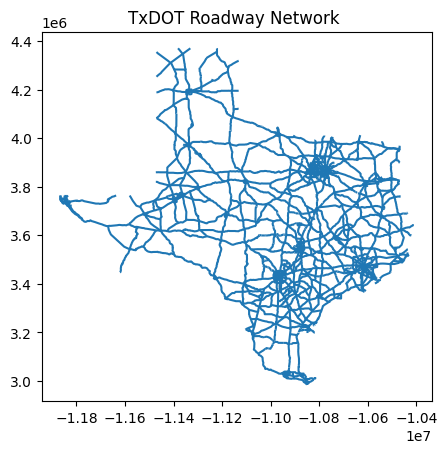

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
shapefile_path = "/content/Texas_Highway_Freight_Network.shp"
gdf = gpd.read_file(shapefile_path)

# Plot the shapefile
gdf.plot()

# Add a title and show the plot
plt.title("TxDOT Roadway Network ")
plt.show()


In [ ]:
!pip install geopandas matplotlib

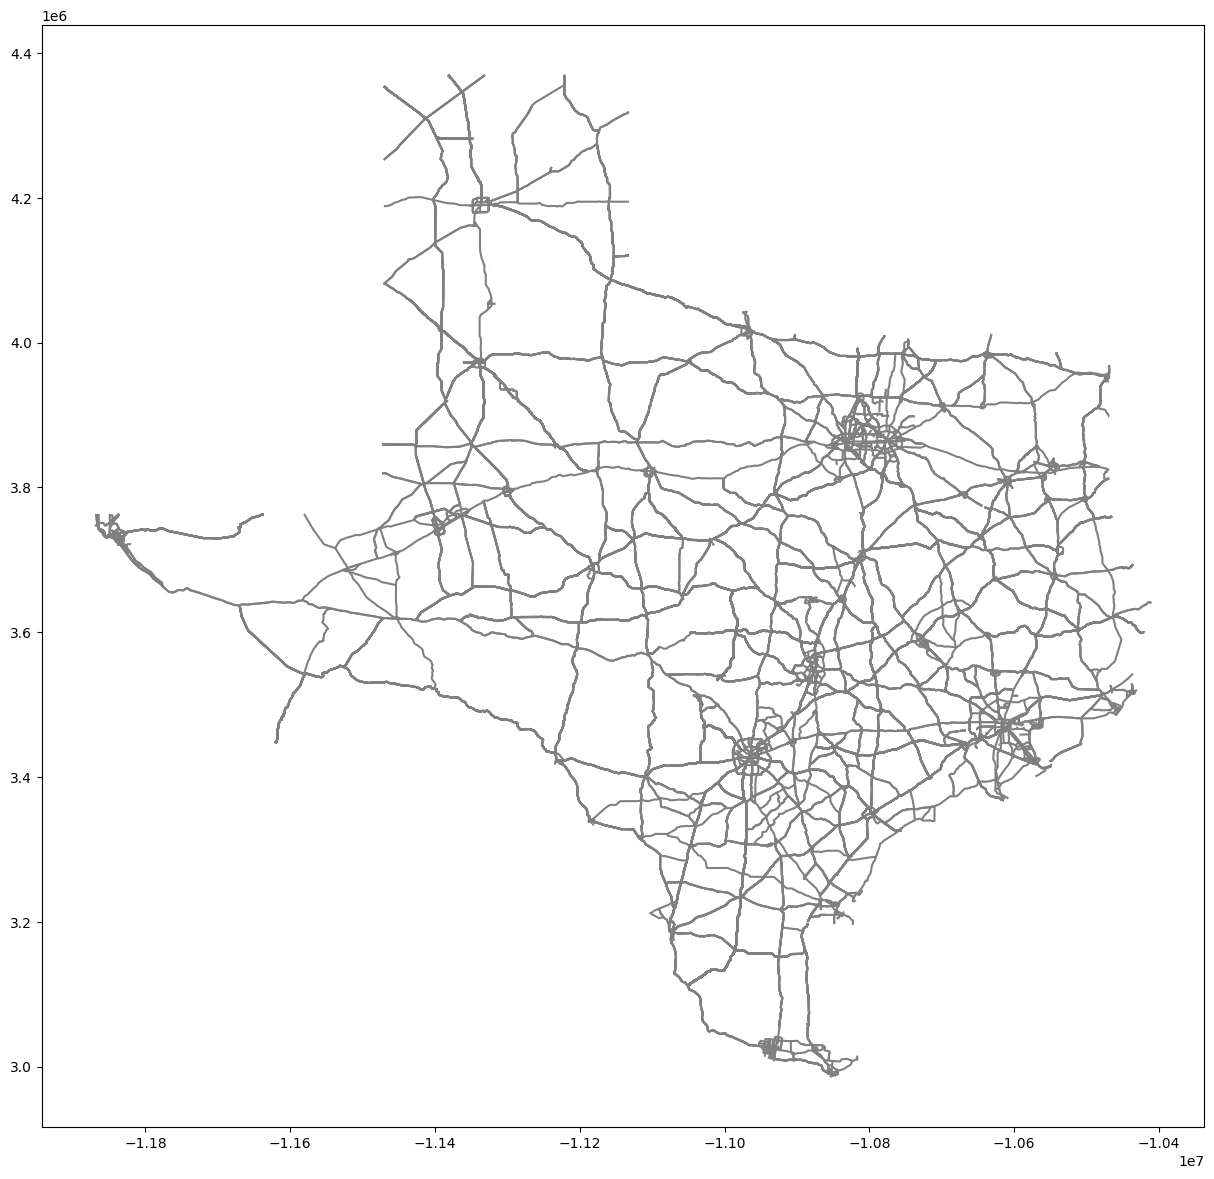

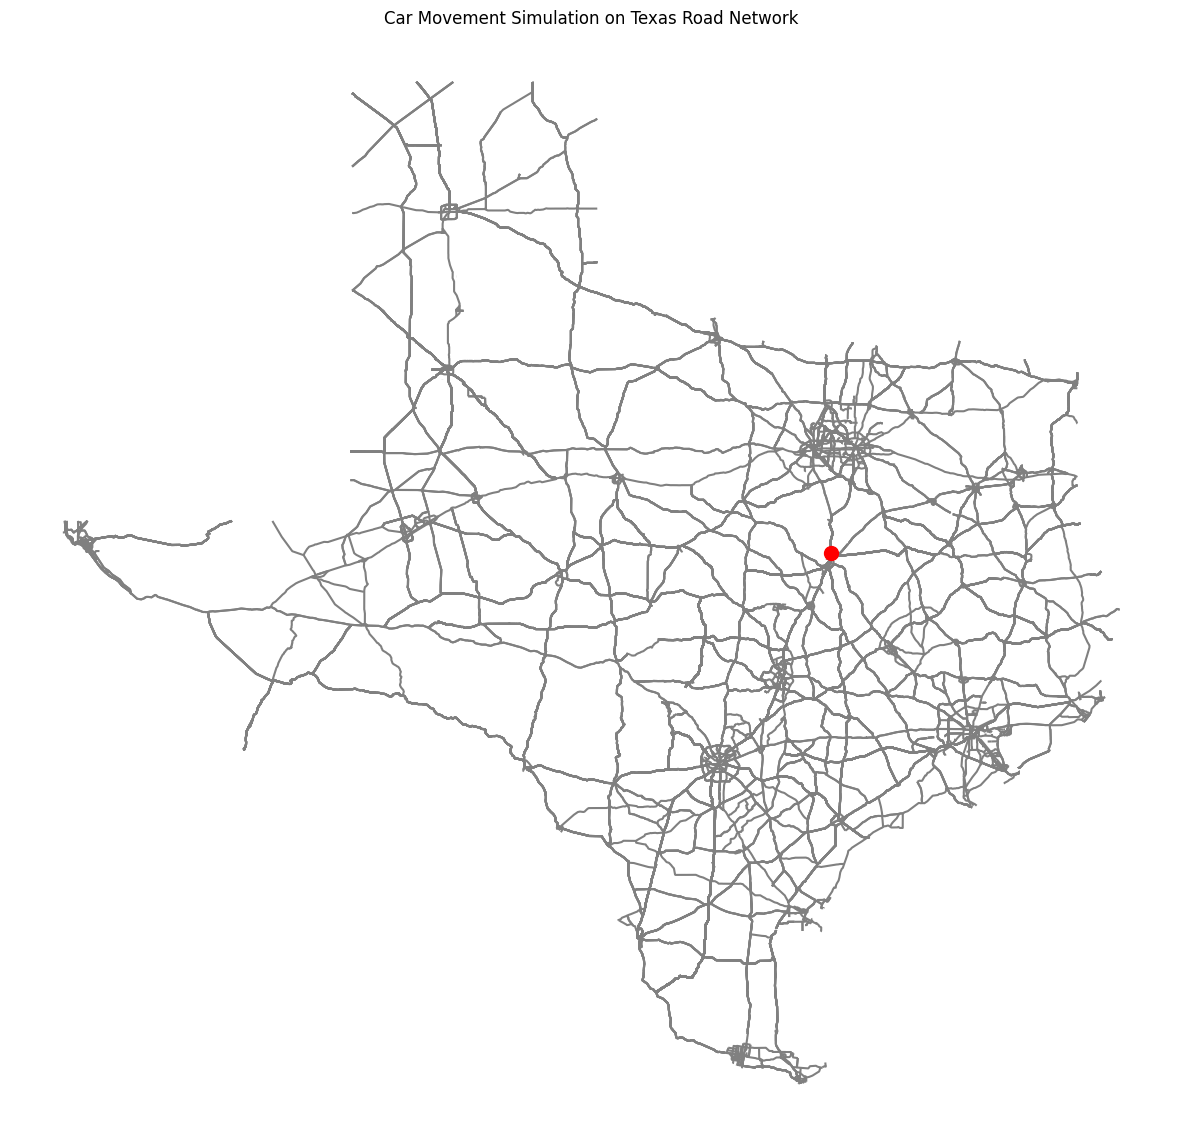

AttributeError: 'GeoSeries' object has no attribute 'nearest'

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np
from IPython.display import clear_output
import time

# Load the shapefile
roads = gpd.read_file('/content/Texas_Highway_Freight_Network.shp')

# Load the CSV file
csv_data = pd.read_csv('/content/TxDOT_Texas_Highway_Freight_Network_7555123259989160460.csv')

# Merge the shapefile and CSV data if necessary
# Assuming 'RTE_NM' is the common column
roads = roads.merge(csv_data, on='RTE_NM', how='left')

# Function to get a random point on the road network
def get_random_point_on_network(gdf):
    total_length = gdf['Shape__Length'].sum()
    random_distance = np.random.random() * total_length

    cumulative_length = 0
    for idx, row in gdf.iterrows():
        cumulative_length += row['Shape__Length']
        if cumulative_length > random_distance:
            line = row.geometry
            distance_along_line = cumulative_length - random_distance
            point = line.interpolate(distance_along_line)
            return point

# Function to move the car along the network
def move_car(gdf, current_position, speed):
    total_length = gdf['Shape__Length'].sum()
    distance_to_move = speed

    while distance_to_move > 0:
        nearest_line = gdf.geometry.nearest(current_position).iloc[0]
        distance_along_line = nearest_line.project(current_position)
        remaining_distance = nearest_line.length - distance_along_line

        if remaining_distance >= distance_to_move:
            new_position = nearest_line.interpolate(distance_along_line + distance_to_move)
            return new_position
        else:
            distance_to_move -= remaining_distance
            current_position = Point(nearest_line.coords[-1])

    return current_position

# Set up the plot
fig, ax = plt.subplots(figsize=(15, 15))
roads.plot(ax=ax, color='gray')

# Initialize car position
car_position = get_random_point_on_network(roads)
car_speed = 100  # Adjust this value to change the speed of the car

# Simulation loop
for _ in range(100):  # Adjust the number of iterations as needed
    # Clear the previous plot
    clear_output(wait=True)

    # Plot the roads and car
    fig, ax = plt.subplots(figsize=(15, 15))
    roads.plot(ax=ax, color='gray')
    ax.plot(car_position.x, car_position.y, 'ro', markersize=10)

    plt.title('Car Movement Simulation on Texas Road Network')
    plt.axis('off')
    plt.show()

    # Move the car
    car_position = move_car(roads, car_position, car_speed)

    # Pause to create animation effect
    time.sleep(0.5)

print("Simulation completed.")

<ipython-input-6-e8269564450f>:55: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(current_point.x, current_point.y)
<ipython-input-6-e8269564450f>:55: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(current_point.x, current_point.y)


Simulation video saved as 'road_network_simulation.mp4'


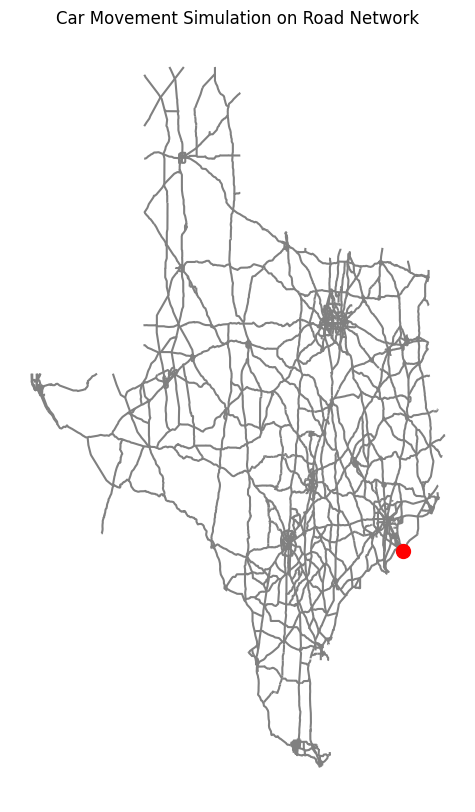

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
from shapely.geometry import LineString
import matplotlib.animation as animation
from IPython.display import HTML

# Set the SHAPE_RESTORE_SHX option
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

# Function to load shapefile with error handling
def load_shapefile(file_path):
    try:
        return gpd.read_file(file_path)
    except Exception as e:
        print(f"Error loading shapefile: {e}")
        print("Creating a simple road network...")

        # Create a simple road network
        lines = [
            LineString([(0, 0), (1, 1), (2, 0), (3, 1), (4, 0)])
        ]
        return gpd.GeoDataFrame({'geometry': lines, 'RTE_NM': ['Road1']})

# Load the shapefile
roads = load_shapefile('/content/Texas_Highway_Freight_Network.shp')

# Ensure CRS is set
if roads.crs is None:
    roads = roads.set_crs("EPSG:4326")  # Assuming WGS84, adjust if needed

# Function to get points along the road network
def get_points_along_network(gdf, num_points=300):
    all_points = []
    for line in gdf.geometry:
        distances = np.linspace(0, line.length, num_points)
        points = [line.interpolate(distance) for distance in distances]
        all_points.extend(points)
    return all_points

# Get points along the road network
road_points = get_points_along_network(roads)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))
roads.plot(ax=ax, color='gray')
point, = ax.plot([], [], 'ro', markersize=10)
ax.set_title('Car Movement Simulation on Road Network')
ax.axis('off')

# Animation function
def animate(i):
    current_point = road_points[i % len(road_points)]
    point.set_data(current_point.x, current_point.y)
    return point,

# Create the animation
num_frames = 300  # 20 fps * 15 seconds
ani = animation.FuncAnimation(fig, animate, frames=num_frames, interval=50, blit=True)

# Save the animation as an MP4 file
ani.save('road_network_simulation.mp4', fps=20, extra_args=['-vcodec', 'libx264'])

print("Simulation video saved as 'road_network_simulation.mp4'")

# Display the video in the notebook
HTML("""
<video width="640" height="480" controls>
  <source src="road_network_simulation.mp4" type="video/mp4">
Your browser does not support the video tag.
</video>
""")